In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'seliers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments') ,
    ('geolocation.csv','geolocation')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Aishu@123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/aishw/OneDrive/Documents/Desktop/e commerse sales analysis'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="Aishu@123",
                           database="ecommerce" )

cur=db.cursor()


# List all unique cities where customers are located.



In [8]:
query = """ select distinct (customer_city ) from Customers  """

cur.execute(query)
data = cur.fetchall()
data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# count the no of orders placed in 2017

In [12]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)= 2017  """

cur.execute(query)
data = cur.fetchall()
data[0][0]

90202

# Find the total sales per category.

In [11]:
query = """ select products.product_category category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id= order_items.product_id 
join payments
on payments.order_id= order_items.order_id
group by category 
"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns= ["category","sales"])
df

,category,sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


# Calculate the percentage of orders that were paid in installments.

In [14]:
query = """ select sum( case when payment_installments >=1 then 1 else 0  end)/ count(*)*100 from payments
"""

cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state.

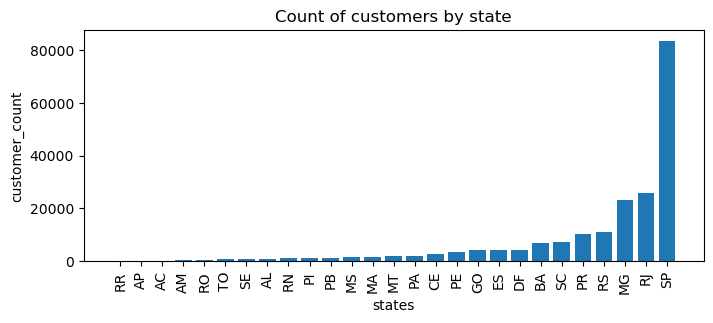

In [29]:
query = """ select customer_state, count(Customer_id) from Customers
group by customer_state
"""

cur.execute(query)
data = cur.fetchall()
df= pd. DataFrame(data, columns=["state" ,"customer_count"])
df= df.sort_values(by ="customer_count")

plt.figure(figsize=(8,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation= 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of customers by state")
plt.show()

# Calculate the number of orders per month in 2018.

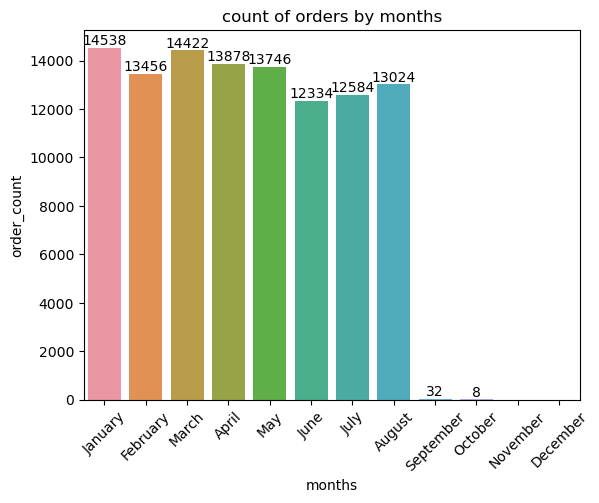

In [31]:
query = """ select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months
"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data, columns=["months" ,"order_count"])
o = ["January","February","March","April","May","June","July","August","September","October","November","December"]

ax=sns.barplot(x=df["months"],y=df["order_count"],data= df, order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("count of orders by months")

plt.show()

# Find the average number of products per order, grouped by customer city.

In [42]:
query = """ with count_per_order as(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc from
orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select Customers.customer_city,round(avg(count_per_order.oc),2) average_orders 
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
"""

cur.execute(query)
data = cur.fetchall()
df=  pd.DataFrame(data,columns=["customer city","average orders"])
df.head(10)


,customer city,average orders
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
5,santos,2.32
6,sao francisco do sul,2.47
7,sao vicente,2.18
8,joinville,2.21
9,sao vendelino,2.00


 # Calculate the percentage of total revenue contributed by each product category.

In [51]:
query = """ select upper(products.product_category) category, round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100, 2) 
sales_percentage
from products join order_items
on products.product_id= order_items.product_id 
join payments
on payments.order_id= order_items.order_id
group by category order by sales_percentage Desc """

cur.execute(query)
data = cur.fetchall()
df=  pd.DataFrame(data,columns=["category","percentage_distribution"])
df.head(10)
df

,category,percentage_distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
...,...,...
69,PC GAMER,0.03
70,HOUSE COMFORT 2,0.02
71,CDS MUSIC DVDS,0.01
72,FASHION CHILDREN'S CLOTHING,0.01


# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
import numpy as np
    
query = """ select products.product_category,count(order_items.product_id),
round(avg(order_items.price),2)
from products
join order_items
on products.product_id=order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df=  pd.DataFrame(data,columns=["category","order_count","price"])
arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1,arr2])
print("the correlation between price and no of times a products  has been purchased is",a[0][1])

the correlation between price and no of times a products  has been purchased is -0.10631514167157562


#  Calculate the total revenue generated by each seller, and rank them by revenue.

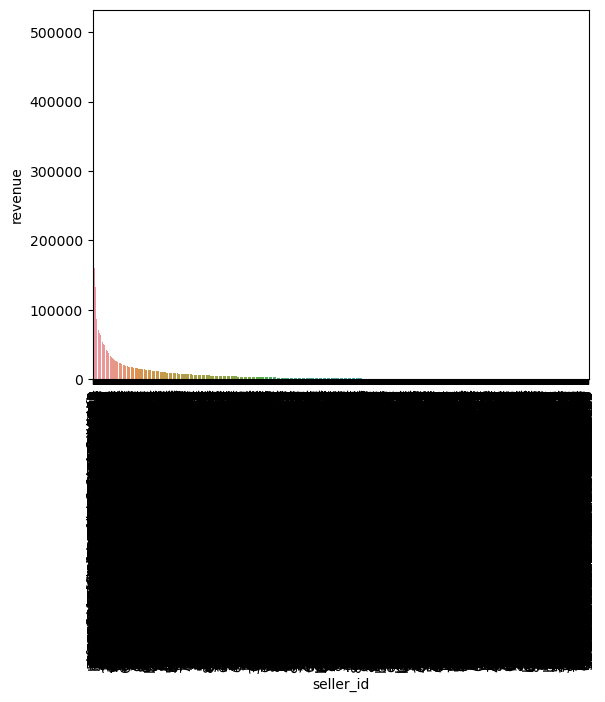

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5


In [6]:
query = """ select * ,dense_rank() over (order by revenue desc)as rn from
(select order_items.seller_id,sum(payments.payment_value)revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=["seller_id","revenue","rank"])
sns.barplot(x="seller_id",y="revenue", data= df)
plt.xticks(rotation=90)
plt.show()
df=df.head(5)
df

#  Calculate the moving average of order values for each customer over their order history.

In [43]:
query = """ select customer_id,order_purchase_timestamp,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row)as mov_avg
from 
 (select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment
from payments join orders
on payments.order_id= orders.order_id)as a """

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data)
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35000610351562),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01000213623047),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.80000305175781),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:1

# Calculate the cumulative sales per month for each year.

In [4]:
query = """ select years,months,payment,sum(payment)
over (order by years,months)cummulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2 ) as payment from orders join payments
on orders.order_id= payments.order_id
group by years, months  order by years,months) as a"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


#  Calculate the year-over-year growth rate of total sales.

In [5]:
query = """ (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2 ) as payment from orders join payments
on orders.order_id= payments.order_id
group by years order by years) """

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data)
df=pd.DataFrame(data,columns=["years","growth"])
df

,years,growth
0,2016,118724.68
1,2017,14499493.46
2,2018,17399526.10
